<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# Проект «Анализ вакансий из HeadHunter»
   

In [ ]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

In [ ]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [ ]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

## 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в базе (вакансии находятся в таблице `vacancies`).

In [ ]:
# текст запроса
query_3_1 = f'''SELECT COUNT(*)
            from public.vacancies
'''

In [ ]:
# результат запроса
df_3_1 = pd.read_sql_query(query_3_1, connection)
df_3_1

<ipython-input-31-f33310df885f>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_1 = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица `employers`).

In [ ]:
# текст запроса
query_3_2 = f'''SELECT COUNT(*)
            from public.employers
'''

In [ ]:
# результат запроса
df_3_2 = pd.read_sql_query(query_3_2, connection)
df_3_2

<ipython-input-33-7515105202d9>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_2 = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитайте с помощью запроса количество регионов (таблица `areas`).

In [ ]:
# текст запроса
query_3_3 = f'''SELECT COUNT(*)
            from public.areas
'''

In [ ]:
# результат запроса
df_3_3 = pd.read_sql_query(query_3_3, connection)
df_3_3

<ipython-input-12-11c9948ba1f3>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитайте с помощью запроса количество сфер деятельности в базе (таблица `industries`).

In [ ]:
# текст запроса
query_3_4 = f'''
SELECT COUNT(*)
from public.industries
'''

In [ ]:
# результат запроса
df_3_4 = pd.read_sql_query(query_3_4, connection)
df_3_4

<ipython-input-35-514047abcccb>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_4 = pd.read_sql_query(query_3_4, connection)


,count
0,294


***

In [ ]:
# выводы по предварительному анализу данных

Проанализировав четыре запроса, я могу сделать следующие выводы:

1. Количество вакансий в базе - 49197
2. Количество работодателей - 23501
3. Количество регионов - 1362
4. Количество сфер деятельности - 294

## 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (`cnt`) вакансий в каждом регионе (`area`).
Отсортируйте по количеству вакансий в порядке убывания.

In [ ]:
# текст запроса
query_4_1 = f'''
SELECT
    a.name AS area,
    COUNT(v.id) AS cnt
from public.vacancies as v
join public.areas as a ON v.area_id=a.id
group by a.name
order by COUNT(v.id) DESC
'''

In [ ]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
df_4_1

<ipython-input-10-e0d1ca36e390>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_1 = pd.read_sql_query(query_4_1, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [ ]:
# текст запроса
query_4_2 = f'''
SELECT
    COUNT(v.id) AS cnt
from public.vacancies as v
where v.salary_from is not NULL OR v.salary_to is not NULL
'''

In [ ]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
df_4_2

<ipython-input-21-bebb05645b92>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до **целого числа**.

In [ ]:
# текст запроса
query_4_3 = f'''
SELECT
    ROUND(AVG(v.salary_from)) AS salary_from,
    ROUND(AVG(v.salary_to)) AS salary_to
from public.vacancies as v

'''

In [ ]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
df_4_3

<ipython-input-37-5722848d6806>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_3 = pd.read_sql_query(query_4_3, connection)


,salary_from,salary_to
0,71065.0,110537.0


In [ ]:
# текст запроса - проверим на NULL
query_4_3 = f'''
With salary_from_to_avg AS (select ROUND(AVG(v.salary_from)) from public.vacancies AS v where v.salary_from is not NULL),
     salary_to_to_avg AS (select ROUND(AVG(v.salary_to)) from public.vacancies AS v where v.salary_to is not NULL)
select *
from salary_from_to_avg, salary_to_to_avg
'''
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
df

<ipython-input-5-202492c37420>:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


,round,round
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (`schedule`) и типа трудоустройства (`employment`), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [ ]:
# текст запроса
query_4_4 = f'''
SELECT
    v.schedule AS schedule,
    v.employment AS employement_type,
    COUNT(v.id) AS cnt
from public.vacancies as v
GROUP BY v.schedule, v.employment
ORDER BY COUNT(v.id) DESC
'''

In [ ]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
df_4_4

<ipython-input-19-f3d798c9d673>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_4 = pd.read_sql_query(query_4_4, connection)


,schedule,employement_type,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля «Требуемый опыт работы» (`experience`) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [ ]:
# текст запроса
query_4_5 = f'''
SELECT
    v.experience AS experience,
    COUNT(v.id) AS cnt
from public.vacancies as v
WHERE v.experience is NOT NULL
GROUP BY v.experience
ORDER BY COUNT(v.id) ASC
'''

In [ ]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
df_4_5

<ipython-input-25-a407e816ef92>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_5 = pd.read_sql_query(query_4_5, connection)


,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

In [ ]:
# выводы по детальному анализу вакансий

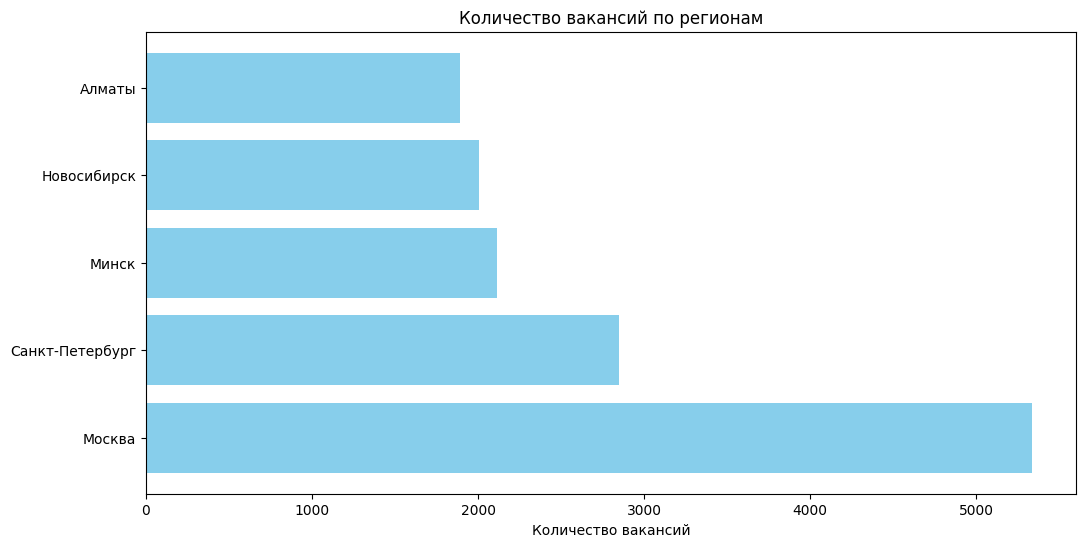

In [ ]:
# Построим график распределения вакансий по топ-5 регионам

plt.figure(figsize=(12, 6))
plt.barh(df_4_1['area'][:5], df_4_1['cnt'][:5], color='skyblue')
plt.xlabel('Количество вакансий')
plt.title('Количество вакансий по регионам')
plt.show()


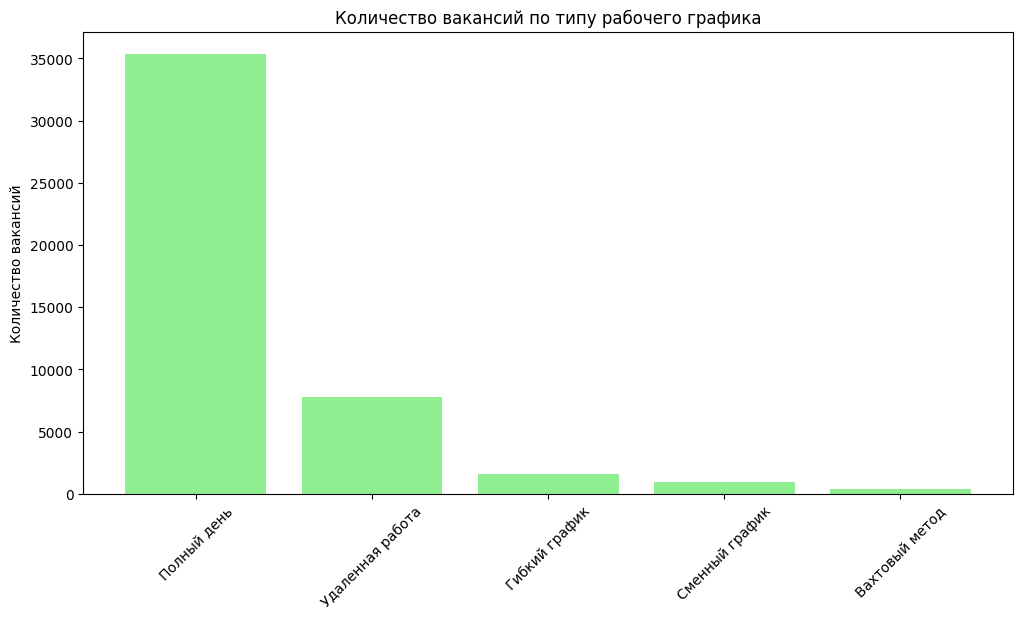

In [ ]:
# График распределения вакансий по типу занятости

plt.figure(figsize=(12, 6))
plt.bar(df_4_4['schedule'], df_4_4['cnt'], color='lightgreen')
plt.ylabel('Количество вакансий')
plt.title('Количество вакансий по типу рабочего графика')
plt.xticks(rotation=45)
plt.show()

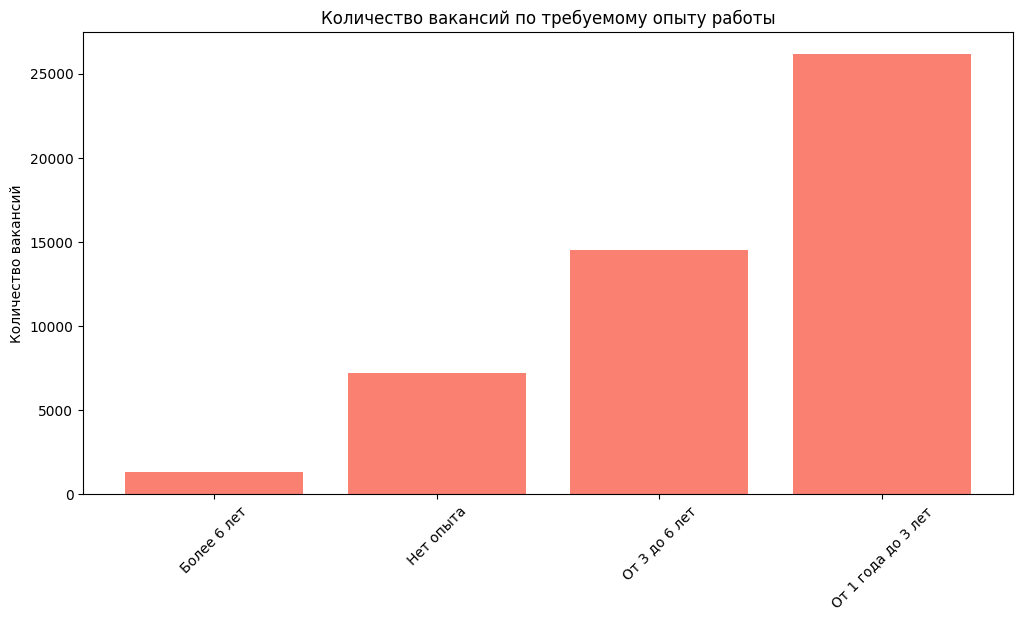

In [ ]:
# График распределения вакансий по требуемому опыту работы

plt.figure(figsize=(12, 6))
plt.bar(df_4_5['experience'], df_4_5['cnt'], color='salmon')
plt.ylabel('Количество вакансий')
plt.title('Количество вакансий по требуемому опыту работы')
plt.xticks(rotation=45)
plt.show()

# **Выводы по разделу 4 "Детальный анализ вакансий"**

*1. Региональный анализ вакансий:*

Наибольшее количество вакансий сосредоточено в Москве (5333), что может указывать на высокую концентрацию бизнеса и потребность в кадрах в столице. Санкт-Петербург и Минск также имеют значительное количество вакансий, но значительно меньше, чем Москва.
Меньшее количество вакансий в удаленных регионах (например, Тарко-Сале, Новоаннинский). В таких регионах меньшая экономическая активность или меньшая потребность в рабочей силе.

*2. Зарплатные данные:*

Из 49197 вакансий только 24073 (около 49%) имеют указанные зарплатные данные. Очевидно, что работодатели не всегда готовы раскрывать эту информацию.
Средние значения зарплат (71065 и 110537) показывают, что диапазон зарплат достаточно широк. Это может быть связано с различными уровнями квалификации и опытом работы.

*3. Типы занятости:*

Большинство вакансий (35367) предлагают полную занятость с полным рабочим днем.
Удаленная работа также занимает значительное место (7802 вакансии). Возможно, это связано с изменениями в трудовых отношениях после пандемии.

*4. Опыт работы:*

Наибольшее количество вакансий (26152) требует от 1 года до 3 лет опыта. А вакансии для кандидатов без опыта (7197) также имеют значительное количество. Все это может указывать на то, что работодатели ищут кандидатов с небольшим опытом работы.

## 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [ ]:
# текст запроса
query_5_1 = f'''
SELECT
    e.name AS employer_name,
    COUNT(v.id) AS cnt
from public.employers as e
join public.vacancies AS v ON e.id = v.employer_id
GROUP BY e.name
ORDER BY cnt DESC
Limit 5
'''

In [ ]:
# результат запроса
df_5_1 = pd.read_sql_query(query_5_1, connection)
#df.iloc[0]['employer_name'], df.iloc[4]['employer_name']
df_5_1

<ipython-input-39-744b82c9e260>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_1 = pd.read_sql_query(query_5_1, connection)


,employer_name,cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [ ]:
# текст запроса
query_5_2= f'''select
    a.name as region,
    count(e.id) as employers_cnt,
    count(v.id) as vacancies_cnt
FROM public.areas as a
LEFT JOIN public.vacancies as v on v.area_id=a.id
LEFT JOIN public.employers as e on a.id = e.area
GROUP BY a.name
Having COUNT(v.id) = 0
ORDER By employers_cnt DESC

'''


In [ ]:
# результат запроса
df_5_2 = pd.read_sql_query(query_5_2, connection)
df_5_2

<ipython-input-41-14e6adc3ead1>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_2 = pd.read_sql_query(query_5_2, connection)


,region,employers_cnt,vacancies_cnt
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
588,Струнино,0,0
589,Славгород (Алтайский край),0,0
590,Сорочинск,0,0
591,Ленинский (Тульская область),0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [ ]:
# текст запроса
query_5_3= f'''(select
    e.name AS employer_name,
    count(DISTINCT a.name) AS areas_cnt
FROM public.employers as e
JOIN public.vacancies as v on v.employer_id = e.id
JOIN public.areas as a on v.area_id=a.id
GROUP BY e.name)
UNION
(select e.name, 0
from public.employers as e
left join public.vacancies as v on v.employer_id = e.id
where v.id is NULL)
ORDER BY areas_cnt DESC
'''

In [ ]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
df_5_3

<ipython-input-43-e83115aae06f>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_3 = pd.read_sql_query(query_5_3, connection)


,employer_name,areas_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23298,Доктор Зета,0
23299,Fiba Retail,0
23300,Эфмек Рус,0
23301,ФГАУ РЦУД и РТ,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.

In [ ]:
# текст запроса
query_5_4= f'''select
    count(e.id) AS employers_cnt
FROM public.employers as e
LEFT JOIN public.employers_industries as e_i on e_i.employer_id = e.id
WHERE e_i.industry_id is NULL

'''

In [ ]:
# результат запроса
df_5_4 = pd.read_sql_query(query_5_4, connection)
df_5_4

<ipython-input-45-59cd48778173>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_4 = pd.read_sql_query(query_5_4, connection)


,employers_cnt
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [ ]:
# текст запроса
query_5_5= f'''select
    e.name AS employers_name,
    count(e_i.industry_id) AS industry_cnt
FROM public.employers as e
LEFT JOIN public.employers_industries as e_i on e_i.employer_id = e.id
GROUP BY e.name
HAVING COUNT(e_i.industry_id) = 4
ORDER BY e.name ASC
OFFSET 2
LIMIT 1
'''

In [ ]:
# результат запроса
df_5_5 = pd.read_sql_query(query_5_5, connection)
df_5_5

<ipython-input-47-55a59fdce066>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_5 = pd.read_sql_query(query_5_5, connection)


,employers_name,industry_cnt
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».


In [ ]:
# текст запроса
query_5_6= f'''select
    i.name AS indutries_name,
    count(e_i.employer_id) AS employers_cnt
FROM public.industries as i
LEFT JOIN public.employers_industries as e_i on e_i.industry_id = i.id
WHERE i.name = 'Разработка программного обеспечения'
GROUP BY i.name
'''

In [ ]:
# результат запроса
df_5_6 = pd.read_sql_query(query_5_6, connection)
df_5_6

<ipython-input-49-b8cbf15ac659>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_6 = pd.read_sql_query(query_5_6, connection)


,indutries_name,employers_cnt
0,Разработка программного обеспечения,3553


In [ ]:
query = '''SELECT
    name
    FROM public.industries
'''

df = pd.read_sql_query(query, connection)
df

<ipython-input-50-5c44b3ea11c8>:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name
0,Разработка программного обеспечения
1,"Системная интеграция, автоматизации технологи..."
2,Безалкогольные напитки (производство)
3,"Безалкогольные напитки (продвижение, оптовая т..."
4,Управление и эксплуатация недвижимости
...,...
289,"Ассоциация в сфере культуры, искусства"
290,Табак (производство)
291,"Рыболовство, рыбоводство"
292,Благотворительная организация


7. Для компании «Яндекс» выведите список [городов-миллионников](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8), в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку "Total" с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

    Если возникнут трудности с этим заданием, посмотрите материалы модуля 6.4 «Как получать данные из веб-источников и API».

In [ ]:
# код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
data = pd.read_html(url)
city_df = data[0]
city_list = list(city_df['Город'])
city_list

# Преобразуем список городов в строку для SQL-запроса
city_list_str = ', '.join(f"'{city}'" for city in city_list)

In [ ]:
# текст запроса
query_5_7= f'''
WITH vacancy_counts AS (
    SELECT
    a.name AS city_name,
    count(v.id) AS vacancy_cnt
FROM public.areas as a
LEFT JOIN public.vacancies AS v ON v.area_id = a.id
LEFT JOIN public.employers AS e ON v.employer_id = e.id
WHERE e.name = 'Яндекс'
    AND a.name IN ({city_list_str})
GROUP BY a.name
ORDER BY COUNT(v.id)
)

SELECT city_name, vacancy_cnt
FROM vacancy_counts

UNION ALL

SELECT 'Total', SUM(vacancy_cnt)
FROM vacancy_counts

'''


In [ ]:
# результат запроса
df_5_7 = pd.read_sql_query(query_5_7, connection)
df_5_7

<ipython-input-53-0bbb2c17c37c>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_7 = pd.read_sql_query(query_5_7, connection)


,city_name,vacancy_cnt
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Уфа,26.0
8,Самара,26.0
9,Краснодар,30.0


***

In [ ]:
# выводы по анализу работодателей

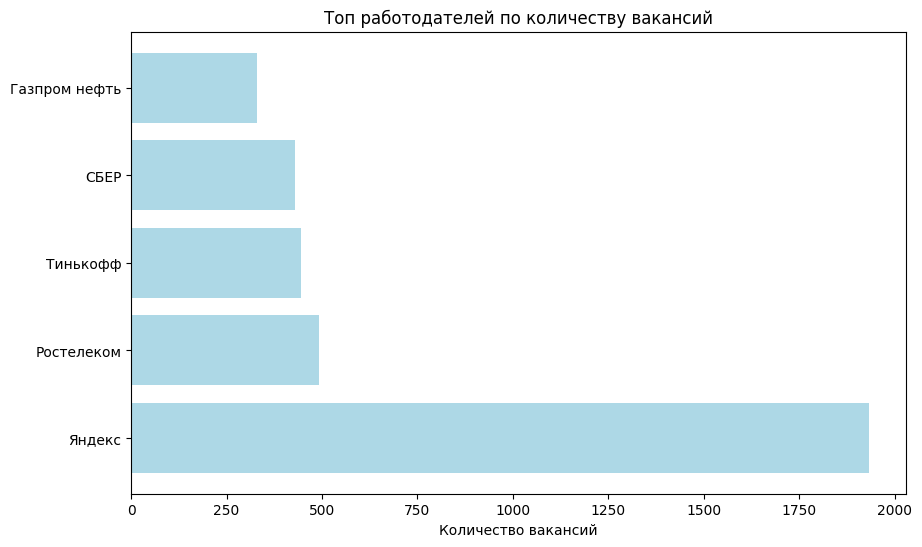

In [ ]:
# График топ работодателей по количеству вакансий
plt.figure(figsize=(10, 6))
plt.barh(df_5_1['employer_name'], df_5_1['cnt'], color='lightblue')
plt.xlabel('Количество вакансий')
plt.title('Топ работодателей по количеству вакансий')
plt.show()

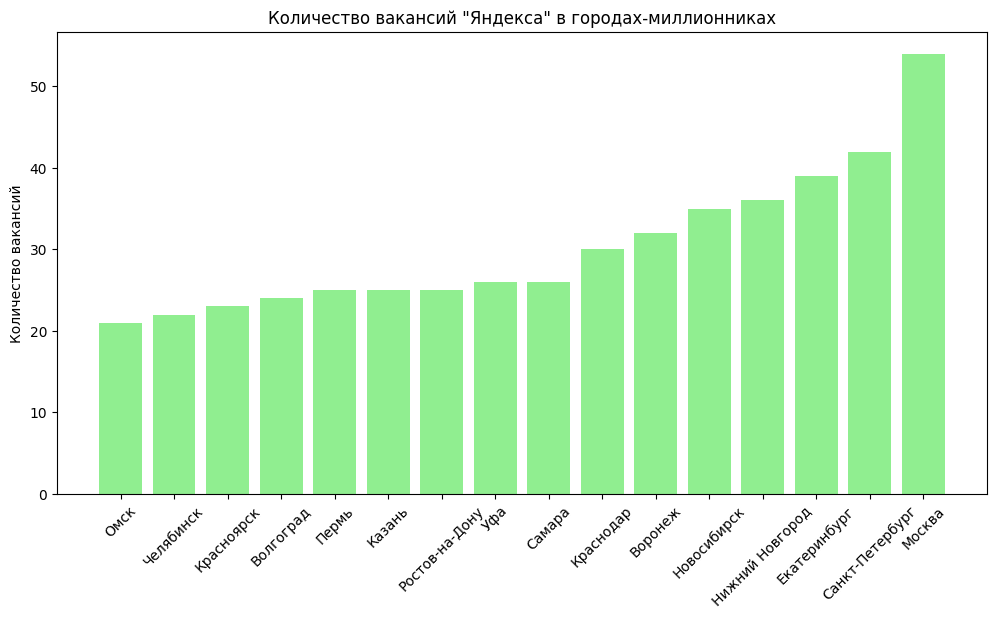

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df_5_7['city_name'][:16], df_5_7['vacancy_cnt'][:16], color='lightgreen')
plt.ylabel('Количество вакансий')
plt.title('Количество вакансий "Яндекса" в городах-миллионниках')
plt.xticks(rotation=45)
plt.show()


# **Выводы по разделу 5 "Анализ работодателей"**

*Топ работодателей:*

На первом месте по количеству вакансий находится компания "Яндекс" с 1933 вакансиями, что указывает на её активное присутствие на рынке труда. Остальные компании, такие как "Ростелеком" и "Тинькофф", имеют значительно меньшее количество вакансий.

*Работодатели без вакансий:*

В регионах, где нет вакансий, количество работодателей варьируется. Например, в России 410 работодателей не имеют вакансий. Возможно, это указывает на отсутствие потребности в найме в этих регионах (хотя они могут присутсвовать не в регионе "Россия", а в других регионах).

*Разнообразие работодателей:*

"Яндекс" публикует вакансии в 181 регионе, очевидно, что у компании достаточно широкая география деятельности.

*Отсутствие сферы деятельности:*

8419 работодателей не указали свою сферу деятельности. Это, скорее всего, затрудняет соискателям поиск информации о потенциальных работодателях и их специализации.

*Компании с несколькими сферами деятельности:*

"2ГИС" является третьей компанией в алфавитном списке, у которой указано четыре сферы деятельности.

*Сфера "Разработка программного обеспечения":*

3553 работодателя указали "Разработка программного обеспечения" в качестве своей сферы деятельности. Это подчеркивает высокую востребованность специалистов в этой области.

*Вакансии "Яндекса" в городах-миллионниках:*

"Яндекс" имеет наибольшее количество вакансий в Москве (54), что может указывать на концентрацию бизнеса в столице. В других городах-миллионниках также есть вакансии, но их количество значительно меньше.

## 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

    Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова `'data'` или `'данн'`.

    *Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*


In [ ]:
# текст запроса
query_6_1= f'''select
    count(id) AS vacancies_cnt
FROM public.vacancies
WHERE LOWER(name) LIKE '%data%'
     OR LOWER(name) LIKE '%данн%'
'''

In [ ]:
# результат запроса
df_6_1 = pd.read_sql_query(query_6_1, connection)
df_6_1

<ipython-input-58-e8ca8a3733ce>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_1 = pd.read_sql_query(query_6_1, connection)


,vacancies_cnt
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
    * 'data scientist'
    * 'data science'
    * 'исследователь данных'
    * 'ML' (здесь не нужно брать вакансии по HTML)
    * 'machine learning'
    * 'машинн%обучен%'

    **В следующих заданиях мы продолжим работать с вакансиями по этому условию.**

    Считаем вакансиями для специалистов уровня Junior следующие:
    + в названии есть слово “junior” **или**
    + требуемый опыт — «Нет опыта» **или**
    + тип трудоустройства — «Стажировка».


In [ ]:
# текст запроса
query_6_2= f'''select
    count(id) AS vacancies_cnt
FROM public.vacancies
WHERE (LOWER(name) LIKE '%data scientist%'
   OR LOWER(name) LIKE '%data science%'
   OR LOWER(name) LIKE '%исследователь данных%'
   OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
   OR LOWER(name) LIKE '%machine learning%'
   OR LOWER(name) LIKE '%машинн%обучен%')
   AND (LOWER(name) LIKE '%junior%'
      OR experience = 'Нет опыта'
      OR employment = 'Стажировка')
'''

In [ ]:
# результат запроса
df_6_2 = pd.read_sql_query(query_6_2, connection)
df_6_2

<ipython-input-60-b7a554361891>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_2 = pd.read_sql_query(query_6_2, connection)


,vacancies_cnt
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или Postgres?

    *Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [ ]:
# текст запроса
query_6_3= f'''select
    count(id) AS vacancies_cnt
FROM public.vacancies
WHERE (LOWER(name) LIKE '%data scientist%'
   OR LOWER(name) LIKE '%data science%'
   OR LOWER(name) LIKE '%исследователь данных%'
   OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
   OR LOWER(name) LIKE '%machine learning%'
   OR LOWER(name) LIKE '%машинн%обучен%')
   AND (key_skills LIKE '%SQL%'
      OR key_skills = '%Postgres%')
'''

In [ ]:
# результат запроса
df_6_3 = pd.read_sql_query(query_6_3, connection)
df_6_3

<ipython-input-62-8a4199a81e3b>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_3 = pd.read_sql_query(query_6_3, connection)


,vacancies_cnt
0,229


In [ ]:
query = f''' SELECT
    key_skills
from public.vacancies
'''

df = pd.read_sql_query(query, connection)
df

<ipython-input-63-2fa0673cc78f>:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,key_skills
0,Пользователь ПК\tРабота в команде\tРемонт ноут...
1,Средства криптографической защиты информации\t...
2,Spring Framework\tSQL\tHibernate ORM\tJava\tGit
3,Spring Framework\tSQL\tHibernate ORM\tJava\tGit
4,None
...,...
49192,Электронный документооборот\t1С: Предприятие 8...
49193,Оптимизация бизнес-процессов\tСтратегическое м...
49194,Организаторские навыки\tУправление персоналом\...
49195,Swift\tRealm\tiOS\tАнглийский язык\tMVP\tMVVM\...


4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

    *Это можно сделать помощью запроса, аналогичного предыдущему.*

In [ ]:
# текст запроса
query_6_4= f'''select
    count(id) AS vacancies_cnt
FROM public.vacancies
WHERE (LOWER(name) LIKE '%data scientist%'
   OR LOWER(name) LIKE '%data science%'
   OR LOWER(name) LIKE '%исследователь данных%'
   OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
   OR LOWER(name) LIKE '%machine learning%'
   OR LOWER(name) LIKE '%машинн%обучен%')
   AND key_skills LIKE '%Python%'

'''

In [ ]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
df_6_4

<ipython-input-65-95116ecfece2>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_4 = pd.read_sql_query(query_6_4, connection)


,vacancies_cnt
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до **двух знаков после точки-разделителя**.

In [ ]:
# текст запроса
query_6_5 = '''
SELECT
    ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, '\t', '')) + 1), 2) AS avg_key_skills,
    COUNT(*) AS total_vacancies
FROM public.vacancies
WHERE (LOWER(name) LIKE '%data scientist%'
   OR LOWER(name) LIKE '%data science%'
   OR LOWER(name) LIKE '%исследователь данных%'
   OR (LOWER(name) LIKE '% ml %' AND LOWER(name) NOT LIKE '%html%')
   OR LOWER(name) LIKE '%machine learning%'
   OR LOWER(name) LIKE '%машинн%обучен%')
   AND key_skills IS NOT NULL
   AND key_skills != ''
'''

In [ ]:
# результат запроса
df_6_5 = pd.read_sql_query(query_6_5, connection)
df_6_5

<ipython-input-12-1cefb534f424>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_5 = pd.read_sql_query(query_6_5, connection)


,avg_key_skills,total_vacancies
0,6.41,352


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта (уникальное значение из поля `experience`).

    При решении задачи примите во внимание следующее:
    1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
    2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
    3. Если в расчётах участвует `null`, в результате он тоже даст `null` (посмотрите, что возвращает запрос `select 1 + null`). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит `null` на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

    Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до **целого числа**.

In [ ]:
# текст запроса
query_6_6 = f'''
SELECT AVG((COALESCE(salary_from, salary_to) + COALESCE(salary_to, salary_from)) / 2)::int
FROM vacancies
WHERE (LOWER(name) LIKE '%data scientist%'
    OR LOWER(name) LIKE '%data science%'
    OR LOWER(name) LIKE '%исследователь данных%'
    OR (name LIKE '%ML%' AND LOWER(name) NOT LIKE '%html%')
    OR LOWER(name) LIKE '%machine learning%'
    OR LOWER(name) LIKE '%машинн%обучен%')
  AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
  AND experience = 'От 3 до 6 лет'
GROUP BY experience
'''

In [ ]:
# результат запроса
df_6_6 = pd.read_sql_query(query_6_6, connection)
df_6_6

<ipython-input-69-12f33d1ad98b>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_6 = pd.read_sql_query(query_6_6, connection)


,avg
0,243115


***

In [ ]:
# выводы по предметному анализу

# **Выводы по разделу 6 "Предметный анализ"**

1. Всего 1771 вакансия имеет отношение к данным.
2. Из 1771 вакансии только 51 подходит для уровня Junior (возможно, из-за высокой конкуренции для начинающих специалистов).
3. 229 вакансий для Data Scientists требуют знания SQL или Postgres.
4. 357 вакансий требуют знания Python.
5. В среднем в вакансиях для Data Scientists указывается 6.41 ключевых навыков (нужны разнообразные навыки).
6. Средняя зарплата для Data Scientists с опытом от 3 до 6 лет составляет 243115 руб., что указывает на высокую ценность специалистов в этой области.

## Общий вывод по проекту

In [ ]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

В ходе анализа вакансий, работодателей и предметного анализа в области Data Science были получены следующие ключевые выводы:

1. Общее количество вакансий: На рынке труда представлено 49197 вакансий, с наибольшим количеством в Москве (5333).
2. Ключевые навыки: Вакансии зачастую требуют навыков SQL (229 вакансий) и Python (357 вакансий).
3. Конкуренция для Junior Data Scientist: Из 1771 вакансии, связанной с данными, только 51 подходит для уровня Junior.
4. Для Data Scientists с опытом от 3 до 6 лет средняя зарплата составляет 243115 руб.

Целесообразно рассмотреть дополнительные исследования и прогнозы в следующих областях:
1. Изучить изменения в количестве вакансий в области Data Science за последние несколько лет для выявления растущих навыков и направлений.
2. Применить методы машинного обучения для прогнозирования будущего спроса на специалистов в области Data Science на основе текущих трендов.
3. Исследовать вакансии по регионам для выявления мест с наибольшим спросом на Data Scientists.
4. Провести опрос среди работодателей о наиболее востребованных навыках для Data Scientists, чтобы лучше понять требования рынка.

Эти дополнительные исследования помогут глубже понять динамику рынка труда и подготовить специалистов к будущим вызовам.

# Финал

In [ ]:
# не забываем закрыть соединение после окончания работы
connection.close()